# **Credit Card Fraud Detection Using Random Forest & XGBoost**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import joblib

In [2]:
df = pd.read_csv('credit-card.csv')
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


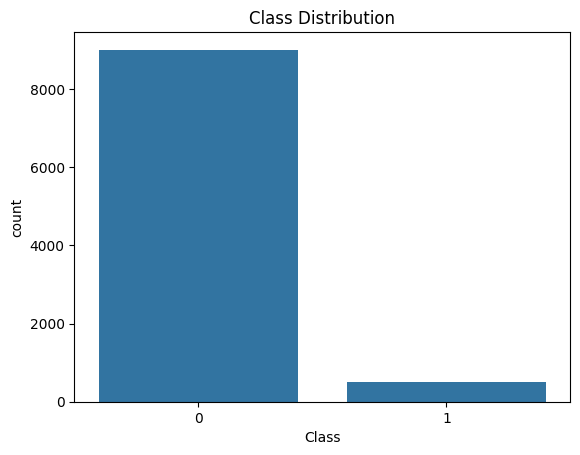

Class
0    9000
1     492
Name: count, dtype: int64


In [3]:
sns.countplot(x=df['Class'])
plt.title('Class Distribution')
plt.show()

print(df['Class'].value_counts())

In [4]:
print(df.isnull().sum().sum())  

0


In [5]:
X = df.drop('Class', axis=1)
y = df['Class']

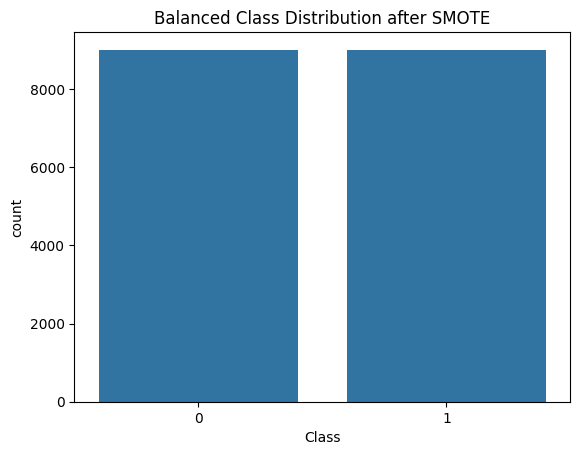

In [6]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

sns.countplot(x=y_resampled)
plt.title('Balanced Class Distribution after SMOTE')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, tree_method="hist")
xgb.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [10]:
def evaluate_model(y_test, y_pred, model_name):
    print(f'Model: {model_name}')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1-Score:', f1_score(y_test, y_pred))

evaluate_model(y_test, rf.predict(X_test), 'Random Forest')
evaluate_model(y_test, xgb.predict(X_test), 'XGBoost')

Model: Random Forest
Accuracy: 0.9947222222222222
Precision: 0.9972082635399219
Recall: 0.9922222222222222
F1-Score: 0.9947089947089947
Model: XGBoost
Accuracy: 0.9952777777777778
Precision: 0.9966573816155989
Recall: 0.9938888888888889
F1-Score: 0.9952712100139082


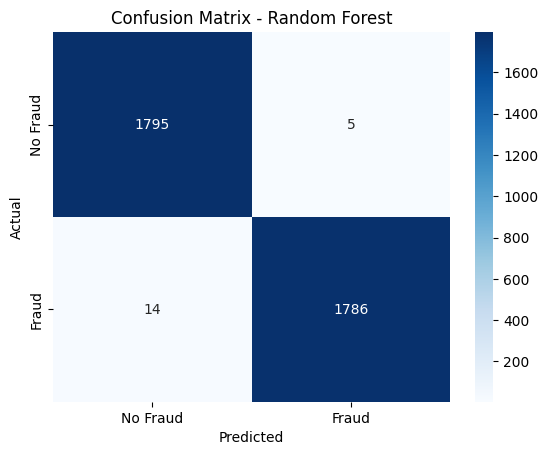

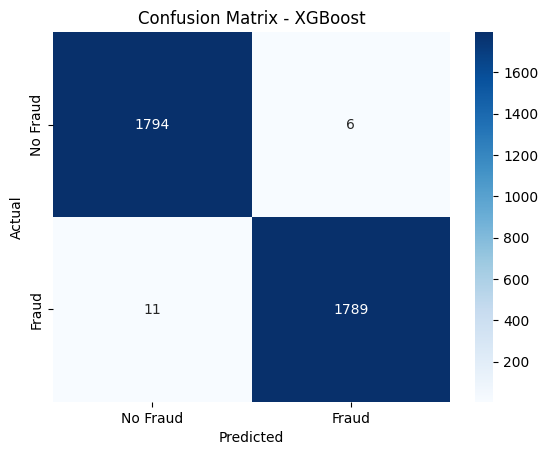

In [11]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, rf.predict(X_test), 'Random Forest')
plot_confusion_matrix(y_test, xgb.predict(X_test), 'XGBoost')

In [12]:
# joblib.dump(rf, 'fraud_model.pkl')
# model = joblib.load('fraud_model.pkl')
# model.predict(X_test)[:5]

In [13]:
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))
print("XGBoost ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_xgb))

Random Forest ROC-AUC Score: 0.9997925925925927
XGBoost ROC-AUC Score: 0.9998435185185185


In [14]:
# rf = RandomForestClassifier(random_state=42)

# # Define the hyperparameter grid
# param_grid_rf = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Perform GridSearchCV
# grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
# grid_search_rf.fit(X_train, y_train)

# # Get the best parameters and best score
# print("Best Parameters:", grid_search_rf.best_params_)
# print("Best Cross-Validation Score:", grid_search_rf.best_score_)

In [15]:
# xgb = XGBClassifier(random_state=42)

# # Define the hyperparameter grid
# param_grid_xgb = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 6, 10],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.2]
# }

# # Perform GridSearchCV
# grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
# grid_search_xgb.fit(X_train, y_train)

# # Get the best parameters and best score
# print("Best Parameters:", grid_search_xgb.best_params_)
# print("Best Cross-Validation Score:", grid_search_xgb.best_score_)

In [16]:
#random
rf = RandomForestClassifier(random_state=42)
param_dist_rf = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=100, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search_rf.fit(X_train, y_train)
print("Best Parameters:", random_search_rf.best_params_)
print("Best Cross-Validation Score:", random_search_rf.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


D:\Python\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
96 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "D:\Python\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "D:\Python\Lib\site-packages\sklearn\utils\_param_validation.py", line 98, in validate_parameter_constr

Best Parameters: {'n_estimators': np.int64(150), 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
Best Cross-Validation Score: 0.9902083333333334


In [17]:
# xgb = XGBClassifier(random_state=42)

# # Define the hyperparameter grid
# param_dist_xgb = {
#     'n_estimators': np.arange(50, 300, 50),
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 6, 10],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.2]
# }

# # Perform RandomizedSearchCV
# random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist_xgb, n_iter=100, cv=3, n_jobs=-1, verbose=2, random_state=42)
# random_search_xgb.fit(X_train, y_train)

# # Get the best parameters and best score
# print("Best Parameters:", random_search_xgb.best_params_)
# print("Best Cross-Validation Score:", random_search_xgb.best_score_)

Accuracy: 0.9944
Precision: 0.9961
Recall: 0.9928
F1 Score: 0.9944
ROC-AUC Score: 0.9998


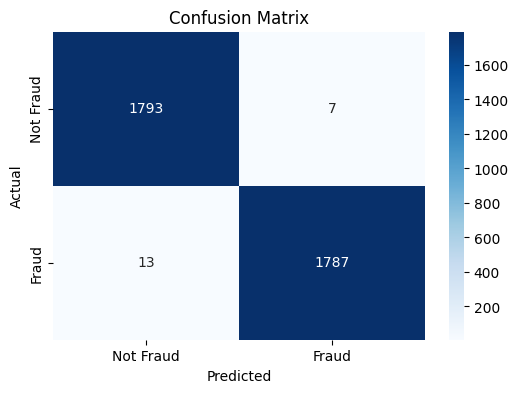

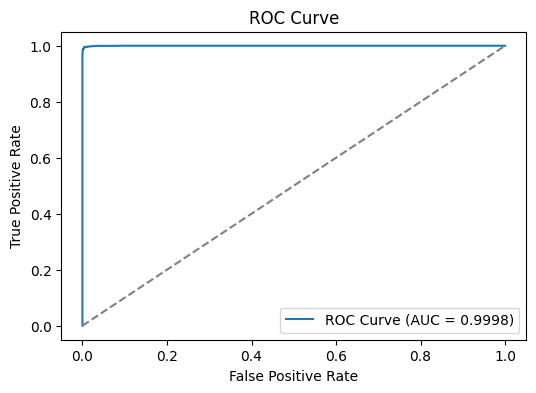

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
    roc_curve, confusion_matrix
)
from sklearn.model_selection import train_test_split

# Train Random Forest with best parameters
best_params = {
    'n_estimators': 150,       # Number of trees
    'min_samples_split': 2,    # Minimum samples to split a node
    'min_samples_leaf': 1,     # Minimum samples per leaf
    'max_features': 'log2',    # Number of features to consider per split
    'max_depth': 30,           # Maximum depth of trees
    'random_state': 42
}

rf = RandomForestClassifier(**best_params)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random model line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
